In [81]:
###¢ IMPORTAR LAS LIBRERIAS #488
import pandas as pd
import matplotlib. pyplot as pit

#### CARGAR LOS DATOS ####
data = pd.read_csv('wholesale customers data.csv')

 

### ANALIZAR LOS DATOS ###
#Conocer la forma de los datos
data. shape

#Conocer Los datos nulos
data. isnull().sum()

#conocer el formato de datos
data.dtypes
 

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [82]:
#seleccionamos datos para verificar el cluster al que pertenecen

indices =[26, 176, 392]
muestras = pd.DataFrame(data.loc[indices],
                        columns = data.keys()).reset_index(drop = True)

In [83]:
#eliminamos las filas seleccionadas para que el modelo 
#no se entrene con estas filas
data= data.drop(indices, axis = 0)




In [84]:
#procesamos los datos
#eliminamos las columnas que no afectan al analizis
data = data.drop(['Region','Channel'],axis = 1)

In [85]:
muestras = muestras.drop(['Region','Channel'],axis = 1)

In [94]:
#realizamos el escalamiento de los datos 
#importamos preprocessing de sklearn incluye una serie de funciones  
#y clases para el preprocesamiento de datos, que se utilizan para preparar los datos antes 
#de aplicar un algoritmo de aprendizaje automático

from sklearn import preprocessing
#está utilizando la clase Normalizer del módulo preprocessing de 
#scikit-learn para escalar los datos de entrada. El método "fit_transform" se utiliza para 
#ajustar el escalador al conjunto de datos "data" y luego transformarlo a los 
#valores normalizados.
data_escalada = preprocessing.Normalizer().fit_transform(data)
muestras_escalada = preprocessing.Normalizer().fit_transform(muestras)

In [95]:
#KMeans es un algoritmo de agrupamiento de aprendizaje automático 
#en el paquete scikit-learn (sklearn) de Python. 
#Se utiliza para agrupar un conjunto de observaciones en k 
#grupos basados en similitudes en las características.
from sklearn.cluster import KMeans

#Se determina las variables a evaluar
X = data_escalada.copy()

In [107]:
#hallar el valor optimo de k
#Se aplicara El Metodo de codo para hallar k
#Se calcula el algoritmo de agrupacion para diferentes valores de k

inercia = []
for i in range(1, 20):
    algoritmo = KMeans(n_clusters = i, init = 'k-means++',
                      max_iter = 300, n_init = 10)
    algoritmo.fit(X)
    #para cada K se calcula la suma total del cuadrado dentro del cluster
    inercia.append(algoritmo.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


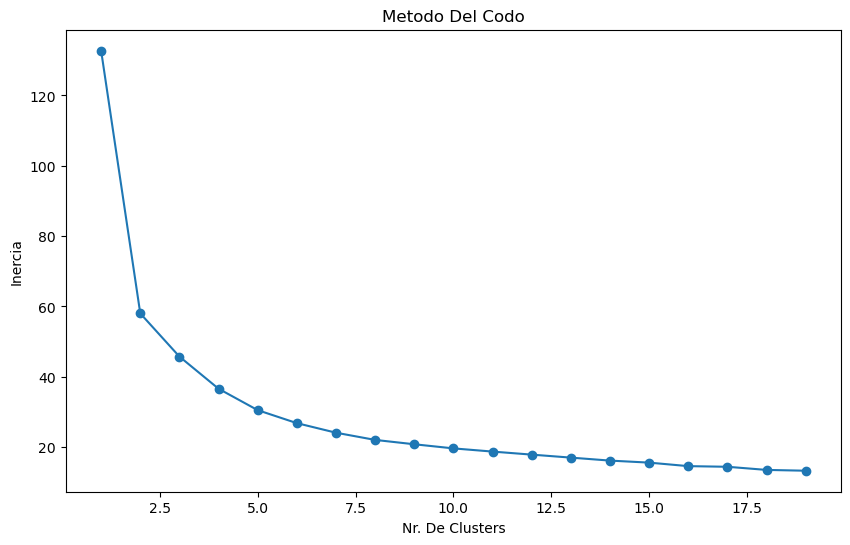

In [108]:
#trazamos la curva de la suma de errores cuadraticos
plt.figure(figsize=[10,6])
plt.title('Metodo Del Codo')
plt.xlabel('Nr. De Clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1,20)), inercia,marker='o')
plt.show()


In [109]:
#Se aplica el algoritmo de clustering
#se define el algoritmo junto con el valor de k
algoritmo = KMeans(n_clusters = 6, init = 'k-means++',
                  max_iter=300, n_init = 10)

In [110]:
#se entrena el algoritmo
algoritmo.fit(X)

KMeans(n_clusters=6)

In [112]:
#se obtiene los datos de los centroides y las etiquetas
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

In [114]:
#verificar  en que cluster se encuentran los datos de muestra
muestra_prediccion = algoritmo.predict(muestras_escalada)
for i, pred in enumerate(muestra_prediccion):
    print("MUESTRA",i,"se encuentran en el cluster:", pred)

MUESTRA 0 se encuentran en el cluster: 5
MUESTRA 1 se encuentran en el cluster: 5
MUESTRA 2 se encuentran en el cluster: 4


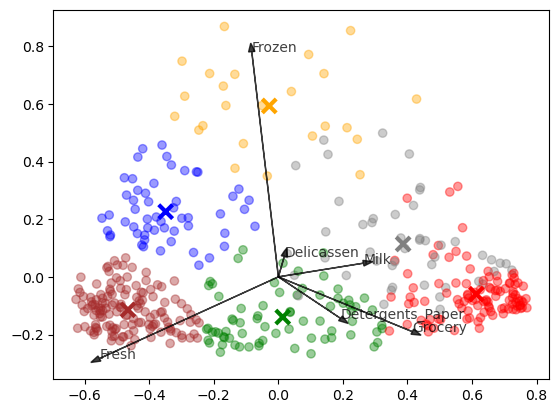

In [118]:
#graficamos los datos

from sklearn.decomposition import PCA

modelo_pca =PCA(n_components=2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X)

#Se aplica la reduccion de dimencionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)

#se define los colores para cada cluster

colores=['blue','red','green','orange','gray','brown']

#se asignan los colores a cada cluster
colores_cluster = [colores[etiquetas[i]]for i in range(len(pca))]

#se grafica los componentes pca

plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster,
           marker= 'o', alpha = 0.4)

#se grafica los centroides

plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
           marker= 'x',s=100, linewidths = 3, c= colores)

# se guardan datos en una variable
xvector= modelo_pca.components_[0] * max(pca[:,0])
yvector= modelo_pca.components_[1] * max(pca[:,1])
columnas =data.columns

#se grafican los nombres de los clusteres con la distancia y el vector
for i in range (len(columnas)):
    #graficamos los vectores
    plt.arrow(0, 0, xvector[i],yvector[i], color='black',
             width = 0.0005, head_width = 0.02, alpha = 0.75)
    #Colocamos los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i],color ='black',
            alpha = 0.75)

plt.show()

